#### Analisis de proyect Books
Objetivo:
En base a las dinamicas de consumo durante la pandemia de coronavirus los habitantes de las ciudades cambiaron sus rutinas decidiendo pasar mas tiempo en casa leyendo de forma online lo que atrajo la atencion de las startups emergentes que vieron la oportunidad de negocio en el negocio de aplicasiones para estas personas, se analizara la base de datos de uno de estos servisios con el objetivo de desarrollar una nueva propuesta de valor para un nuevo producto 

In [ ]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from urllib.parse import quote_plus
db = {
    'user': 'practicum_student',
    'pwd': 'QnmDH8Sc2TQLvy2G3Vvh7',
    'host': 'yp-trainers-practicum.cluster-czs0gxyx2d8w.us-east-1.rds.amazonaws.com',
    'port': 5432,
    'db': 'data-analyst-final-project-db'
}

password = quote_plus(db['pwd'])
connection_string = (
    f"postgresql+psycopg2://{db['user']}:{password}"
    f"@{db['host']}:{db['port']}/{db['db']}"
)
engine = create_engine(connection_string, connect_args={"sslmode": "require"})

In [ ]:
df_books= pd.io.sql.read_sql('select * from books', con = engine)

In [ ]:
df_head = pd.read_sql("SELECT * FROM books LIMIT 5;", con=engine)
df_head.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [ ]:
query = """
SELECT
  book_id,
  author_id,
  title,
  num_pages,
  CAST(publication_date AS date) AS publication_date
FROM books
LIMIT 5;
"""

df_head = pd.read_sql(query, con=engine)
print(df_head)

   book_id  author_id                                              title  \
0        1        546                                       'Salem's Lot   
1        2        465                 1 000 Places to See Before You Die   
2        3        407  13 Little Blue Envelopes (Little Blue Envelope...   
3        4         82  1491: New Revelations of the Americas Before C...   
4        5        125                                               1776   

   num_pages publication_date  
0        594       2005-11-01  
1        992       2003-05-22  
2        322       2010-12-21  
3        541       2006-10-10  
4        386       2006-07-04  


 número de libros publicados después del 1 de enero de 2000.

In [ ]:
query = """
SELECT COUNT(*) AS num_books_after_2000
FROM books
WHERE publication_date > '2000-01-01';
"""
df = pd.read_sql(query, con=engine)
print(df.loc[0, 'num_books_after_2000'])

819


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el cálculo! Aplicaste el filtro correcto para obtener los datos
</div>

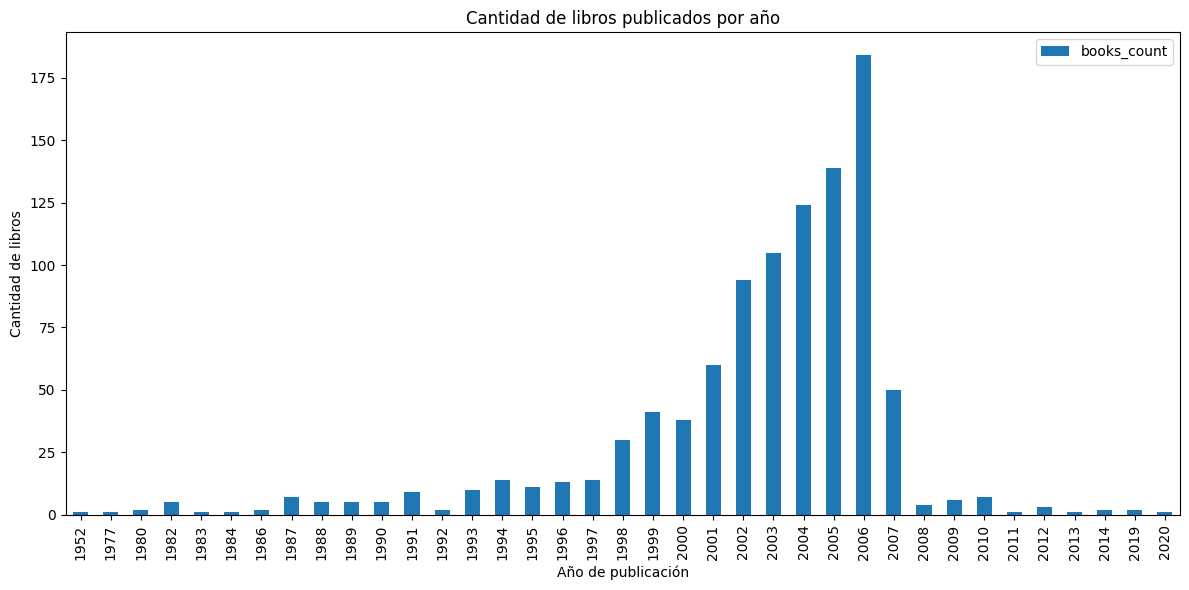

In [ ]:
query = """
SELECT
  EXTRACT(YEAR FROM publication_date)::INT AS publication_year,
  COUNT(*) AS books_count
FROM books
GROUP BY publication_year
ORDER BY publication_year;
"""
df_year_counts = pd.read_sql(query, con=engine)

# Ahora puedes graficar lo mismo que con pandas:
df_year_counts.plot(
    x='publication_year',
    y='books_count',
    kind='bar',
    figsize=(12, 6)
)
plt.title('Cantidad de libros publicados por año')
plt.xlabel('Año de publicación')
plt.ylabel('Cantidad de libros')
plt.tight_layout()
plt.show()

In [ ]:
query = """
SELECT
  COUNT(*) - COUNT(book_id)           AS null_book_id,
  COUNT(*) - COUNT(author_id)         AS null_author_id,
  COUNT(*) - COUNT(title)             AS null_title,
  COUNT(*) - COUNT(num_pages)         AS null_num_pages,
  COUNT(*) - COUNT(publication_date)  AS null_publication_date,
  COUNT(*) - COUNT(publisher_id)      AS null_publisher_id
FROM books;
"""

df_nulls = pd.read_sql(query, con=engine)
print(df_nulls.T)  # Transpone para verlo columna por fila

                       0
null_book_id           0
null_author_id         0
null_title             0
null_num_pages         0
null_publication_date  0
null_publisher_id      0


In [ ]:
query = """
SELECT
  COUNT(num_pages) AS count,
  AVG(num_pages) AS mean,
  STDDEV_POP(num_pages) AS stddev,
  MIN(num_pages) AS min,
  PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY num_pages) AS percentile_25,
  PERCENTILE_CONT(0.50) WITHIN GROUP (ORDER BY num_pages) AS median,
  PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY num_pages) AS percentile_75,
  MAX(num_pages) AS max
FROM books;
"""

# Ejecutar la consulta y obtener los resultados
with engine.connect() as connection:
    result = connection.execute(query)
    for row in result:
        print(row)

(1000, Decimal('389.1110000000000000'), Decimal('229.275416647751'), 14, 249.0, 352.0, 453.0, 2690)


count: 1000
(Hay 1000 libros con valor en num_pages)

mean (promedio): 389.111
(En promedio, los libros tienen unas 389 páginas)

stddev (desviación estándar): 229.275
(La cantidad de páginas varía bastante alrededor del promedio)

min (mínimo): 14
(El libro más corto tiene 14 páginas)

percentile 25: 249
(El 25% de los libros tiene hasta 249 páginas)

median (percentil 50): 352
(La mediana está en 352 páginas, la mitad de los libros tiene menos o igual a eso)

percentile 75: 453
(El 75% de los libros tiene hasta 453 páginas)

max (máximo): 2690
(El libro más largo tiene 2690 páginas)

In [ ]:
query = """
SELECT
  publication_date::DATE AS publication_date
FROM books;
"""

In [ ]:
df_authors= pd.io.sql.read_sql('select * from authors', con = engine)

In [ ]:
df = pd.read_sql("SELECT * FROM authors LIMIT 5;", con=engine)
print(df)

   author_id                          author
0          1                      A.S. Byatt
1          2  Aesop/Laura Harris/Laura Gibbs
2          3                 Agatha Christie
3          4                   Alan Brennert
4          5        Alan Moore/David   Lloyd


In [ ]:
query = """
SELECT
  COUNT(*) AS total_rows,
  COUNT(*) - COUNT(author_id) AS null_author_id,
  COUNT(*) - COUNT(author) AS null_author
FROM authors;
""" 

In [ ]:
df_publishers= pd.io.sql.read_sql('select * from publishers', con = engine)

In [ ]:
query = """
SELECT
  COUNT(*) AS total_rows,
  COUNT(*) - COUNT(publisher_id) AS null_publisher_id,
  COUNT(*) - COUNT(publisher) AS null_publisher
FROM publishers;
"""
df_nulls = pd.read_sql(query, con=engine)
print(df_nulls)


   total_rows  null_publisher_id  null_publisher
0         340                  0               0


In [ ]:
query = """
SELECT * FROM publishers
LIMIT 5;
"""
df_publishers = pd.read_sql(query, con=engine)
print(df_publishers)

   publisher_id                          publisher
0             1                                Ace
1             2                           Ace Book
2             3                          Ace Books
3             4                      Ace Hardcover
4             5  Addison Wesley Publishing Company


Editorial que ha publicado el mayor numero de libros con mas de 50 paginas 

In [ ]:
query = """
SELECT
    p.publisher_id,
    p.publisher,
    COUNT(b.book_id) AS num_books
FROM books b
JOIN publishers p ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher_id, p.publisher
ORDER BY num_books DESC
LIMIT 1;
"""
df_publishers = pd.read_sql(query, con=engine)
print(df_publishers)


   publisher_id      publisher  num_books
0           212  Penguin Books         42


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, bien utilizado las funciones de agregación para obtener los resultados
</div>

In [ ]:
df_ratings= pd.io.sql.read_sql('select * from ratings', con = engine)

In [ ]:
df_ratings = pd.read_sql("SELECT * FROM ratings LIMIT 5;", con=engine)
df_ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [ ]:
query = """
SELECT
    COUNT(*) AS total_rows,
    COUNT(*) - COUNT(rating_id) AS null_rating_id,
    COUNT(*) - COUNT(book_id) AS null_book_id,
    COUNT(*) - COUNT(username) AS null_username,
    COUNT(*) - COUNT(rating) AS null_rating
FROM ratings;
"""

df_nulls = pd.read_sql(query, con=engine)
print(df_nulls)

   total_rows  null_rating_id  null_book_id  null_username  null_rating
0        6456               0             0              0            0


In [ ]:
df_reviews= pd.io.sql.read_sql('select * from reviews', con = engine)

In [ ]:
df_reviews = pd.read_sql("SELECT * FROM reviews;", con=engine)
print(df_reviews.head())

   review_id  book_id       username  \
0          1        1   brandtandrea   
1          2        1     ryanfranco   
2          3        2       lorichen   
3          4        3  johnsonamanda   
4          5        3    scotttamara   

                                                text  
0  Mention society tell send professor analysis. ...  
1  Foot glass pretty audience hit themselves. Amo...  
2  Listen treat keep worry. Miss husband tax but ...  
3  Finally month interesting blue could nature cu...  
4  Nation purpose heavy give wait song will. List...  


In [ ]:
# Normalizar nombres de usuario (muy importante para empatar los datos)
df_ratings['username'] = df_ratings['username'].str.strip().str.lower()
df_reviews['username'] = df_reviews['username'].str.strip().str.lower()


 número promedio de reseñas de texto entre los usuarios que calificaron más de 50 libros.

In [ ]:
query = """
WITH ratings_per_user AS (
    SELECT
        username,
        COUNT(*) AS num_ratings
    FROM ratings
    GROUP BY username
    HAVING COUNT(*) > 50
),
text_reviews_count AS (
    SELECT
        rpu.username,
        COUNT(rev.text) AS num_text_reviews
    FROM ratings_per_user rpu
    LEFT JOIN reviews rev ON rpu.username = rev.username
    GROUP BY rpu.username
)
SELECT
    ROUND(AVG(num_text_reviews), 2) AS avg_text_reviews
FROM text_reviews_count;
"""

df_result = pd.read_sql(query, con=engine)
print(df_result)

   avg_text_reviews
0             24.33


In [ ]:
query = """
SELECT
  book_id,
  COUNT(rating) AS num_reviews,
  ROUND(AVG(rating), 2) AS avg_rating
FROM ratings
GROUP BY book_id
ORDER BY book_id
LIMIT 5;
"""
df_reviews= pd.read_sql(query, con=engine)
print(df_reviews)

   book_id  num_reviews  avg_rating
0        1            3        3.67
1        2            2        2.50
2        3            3        4.67
3        4            2        4.50
4        5            6        4.00


In [ ]:
query = """
SELECT
    au.author_id,
    au.author,
    ROUND(AVG(sub.avg_rating), 2) AS author_avg_rating
FROM (
    SELECT
        r.book_id,
        COUNT(r.rating) AS num_ratings,
        ROUND(AVG(r.rating), 2) AS avg_rating
    FROM ratings r
    GROUP BY r.book_id
    HAVING COUNT(r.rating) >= 50
) sub
JOIN books b ON sub.book_id = b.book_id
JOIN authors au ON b.author_id = au.author_id
GROUP BY au.author_id, au.author
ORDER BY author_avg_rating DESC
LIMIT 1;
"""
df_authors= pd.read_sql(query, con=engine)
print(df_authors)

   author_id                      author  author_avg_rating
0        236  J.K. Rowling/Mary GrandPré               4.29


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Cómo puedes observar la forma en la que hagamos los filtros o se haga uso de subconsultas va a cambiar el resultado en la salida de las mismas
</div>

Editorial que ha publicado el mayor número de libros con más de 50 páginas

In [ ]:
query = """
SELECT
    pub.publisher_id,            
    pub.publisher,               
    COUNT(*) AS num_books        
FROM books b
JOIN publishers pub 
    ON b.publisher_id = pub.publisher_id 
WHERE b.num_pages > 50        
GROUP BY pub.publisher_id, pub.publisher
ORDER BY num_books DESC         
LIMIT 1; 
"""
df_publishers= pd.read_sql(query, con=engine)
print(df_publishers)


   publisher_id      publisher  num_books
0           212  Penguin Books         42


Autor que tiene la calificación promedio más alta considerando solo los libros que tienen al menos 50 reseñas

In [ ]:
print(df_reviews.columns)

Index(['book_id', 'num_reviews', 'avg_rating'], dtype='object')


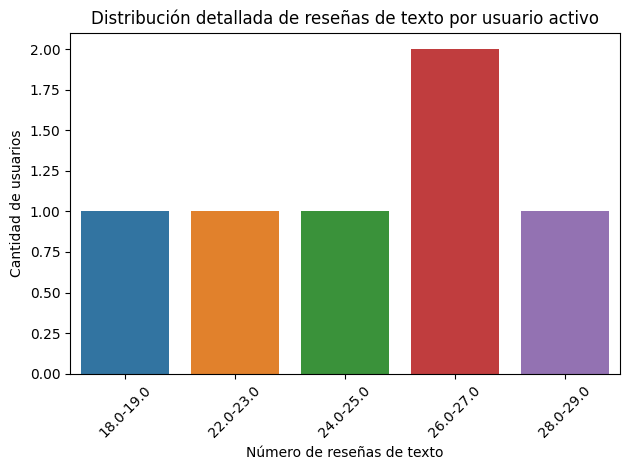

In [ ]:
query = """
WITH ratings_per_user AS (
    SELECT
        username,
        COUNT(*) AS num_ratings
    FROM ratings
    GROUP BY username
    HAVING COUNT(*) > 50
),
text_reviews_count AS (
    SELECT
        rpu.username,
        COUNT(rev.text) AS num_text_reviews
    FROM ratings_per_user rpu
    LEFT JOIN reviews rev ON rpu.username = rev.username
    GROUP BY rpu.username
),
binned_counts AS (
    SELECT
        FLOOR(num_text_reviews / 2) * 2 AS bin_start,
        COUNT(*) AS num_users
    FROM text_reviews_count
    GROUP BY bin_start
    ORDER BY bin_start
)
SELECT
    bin_start,
    bin_start + 1 AS bin_end,
    num_users
FROM binned_counts;
"""
df_bins = pd.read_sql(query, con=engine)

# Crear etiquetas tipo "0-1", "2-3", "4-5", etc.
df_bins['range'] = df_bins['bin_start'].astype(str) + '-' + df_bins['bin_end'].astype(str)

# Graficar con etiquetas más detalladas
sns.barplot(x='range', y='num_users', data=df_bins)
plt.title('Distribución detallada de reseñas de texto por usuario activo')
plt.xlabel('Número de reseñas de texto')
plt.ylabel('Cantidad de usuarios')
plt.xticks(rotation=45)  # Rota etiquetas para que se vean mejor
plt.tight_layout()       # Ajusta para evitar que se corten etiquetas
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario general (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con las diferentes consultas realizadas, se obtuvo los resultados adecuados aplicando las operaciones correctas en cada una.

Cómo consejo adicional, debido a que SQL es un lenguaje que verás en tu día a día cómo Data Analyst te animo a seguir practicando con el mismo para que en las entrevistas técnicas destaques cómo profesional! Será muy común que cuando postules a un puesto laboral te pidan hacer una prueba de SQL, te recomiendo revisar plataformas cómo Leetcode ya que tienen ejercicios de SQL para prepararte para las entrevistas, particularmente SQL lo encuentras en este link: https://leetcode.com/problemset/database/
    
Saludos!
</div>